In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from termcolor import colored

You can download the user_training_dataset_update.csv from the link below:

https://drive.google.com/open?id=1tQGlNvkmGVPGcmQID2NNd5p8bkLBxofM

In [2]:
user_training_dataset=pd.read_csv("C:/Users/yuka.abe/Desktop/project_user_final_training_dataset.csv")

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
user_training_dataset.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed',
       'number_of_days_account_creation_numeric_value',
       'number_of_active_days_numeric_value',
       'Account_creation_before_booking_flag', 'user_id_x', 'session count',
       'user_id_y', 'Total time spent (in seconds)'],
      dtype='object')

Create a function for showing the descriptive statistics and visualization for continuous and categorical variables:

In [35]:
def func_variable_exploratory_analysis(dataset, variable_name, variable_type):
    # Make sure variable type is input correctly. If the variable_type input does not fall in the three categories below, an error will be raised.
    if variable_type not in ['Categorical', "Continuous", "Datetime"]:
        raise ValueError("The variable type should be Categorical, Continuous or Datetime")
    else:
        if variable_type=='Categorical':
            print('\033[1m' +"Distribution of the categorical variables:" + variable_name )
            print('\033[0m')
            print(dataset[variable_name].value_counts())

            d=dataset[variable_name].value_counts()/dataset['id'].count()

            print('\033[1m' +"Distribution of the categorical variables (In Percentage):" + variable_name)
            print('\033[0m')
            print(d.apply(lambda x: "{0:.0%}".format(x)))

            print('\033[1m' +"Below is the distribution the of the categorical variable:" + variable_name)
            print('\033[0m')
            
            dataset[variable_name].hist()
            plt.show()
            
        if variable_type=='Continuous':
            number_of_data_points=dataset[variable_name].count()
            estimate_of_number_bins=int(np.sqrt(number_of_data_points))
            print('\033[1m' +"Descriptive Statistics:" + variable_name)
            print('\033[0m')

            print(dataset[variable_name].describe())


            print('\033[1m' +"Number of observations with missing value for the continuous variable:" + variable_name)
            print('\033[0m')

            print( dataset['id'].count()-dataset[variable_name].describe()['count'])


            print('\033[1m' +"PDF and CDF of the variable:" + variable_name)
            print('\033[0m')


            fig=plt.figure()

            ax1=plt.subplot(2,1,1)
            ax1=dataset[variable_name].hist(bins=estimate_of_number_bins)
            plt.title('PDF of the continuous variable')

            ax2=plt.subplot(2,1,2)
            ax2=dataset[variable_name].hist(bins=estimate_of_number_bins, cumulative=True, normed=True)
            plt.title('CDF of the continuous variable')

            ax1.get_shared_x_axes().join(ax1, ax2)
            ax1.set_xticklabels([])
            plt.show()
        if variable_type=='Datetime':
            date_variable=pd.to_datetime(dataset[variable_name])

            print('\033[1m' +"Number of observations with missing value for the continuous variable:" + variable_name)
            print('\033[0m')

            print("Number of observations with missing value for the continuous variable:"+ variable_name, dataset['id'].count()-dataset[variable_name].describe()['count'])
            
            print("date range of " + variable_name + " : From " ,date_variable.min(), " To ", date_variable.max() )







Create three different lists of column names for categorical variables, continuous variables and datetime variables

In [210]:
categorical_variables=['signup_flow', 'gender', 'signup_method','language', 'affiliate_channel','affiliate_provider',  'first_affiliate_tracked','signup_app', 'first_device_type', 'first_browser', 'country_destination', 'Account_creation_before_booking_flag'  ]
continuous_variables=['age_computed', 'number_of_days_account_creation', 'number_of_active_days_numeric_value', 'number_of_days_account_creation_numeric_value' , 'session count', 'Total time spent (in seconds)']
timestamp_variables=['timestamp_first_active_cleaned', 'date_account_created','date_first_booking' ]

Exploratory Analysis for all the categorical variables:

Highlight from the categorical variables:
- Around 50% of the users' first booking country is NDF (Not Defined). Based on the info on Kaggle, NDF means there was no booking yet.
- 45% of the gender is unknown.
- most of users have basic sign-up method.
- 97% of the users have 'English' as their browser language.
- 65% of the users come directly to the site.
- 86% of the users sign up to the website through computers
- 42% of the users use Mac desktop while 34% of the users use windows
- We are missing the first booking time for more than 50% of the users since these users have not made a booking yet online. Besides the users who have not booked their trip, 10% of users create an account and made the first booking on the same day and 32% of users have created account at least a day before their first booking.
- 77% of the users signed up at page 0.



Note: Below is the definition of the account creation before booking flag:
0: Account creation after first booking
1: Account creation and first booking happened on the same day
2: Account creation before first booking



In [211]:
categorical_variables

['signup_flow',
 'gender',
 'signup_method',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser',
 'country_destination',
 'Account_creation_before_booking_flag']

Distribution of the categorical variables:signup_flow

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64
Distribution of the categorical variables (In Percentage):signup_flow

0     77%
25     7%
12     4%
3      4%
2      3%
24     2%
23     1%
1      0%
6      0%
8      0%
21     0%
5      0%
20     0%
16     0%
15     0%
10     0%
4      0%
Name: signup_flow, dtype: object
Below is the distribution the of the categorical variable:signup_flow



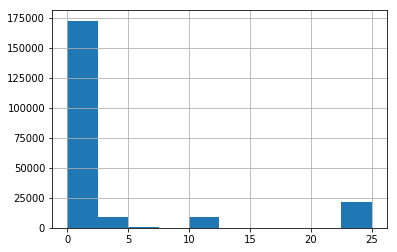

Distribution of the categorical variables:gender

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64
Distribution of the categorical variables (In Percentage):gender

-unknown-    45%
FEMALE       30%
MALE         26%
OTHER         0%
Name: gender, dtype: object
Below is the distribution the of the categorical variable:gender



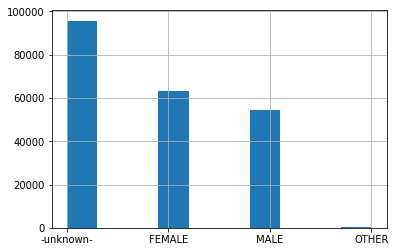

Distribution of the categorical variables:signup_method

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
Distribution of the categorical variables (In Percentage):signup_method

basic       72%
facebook    28%
google       0%
Name: signup_method, dtype: object
Below is the distribution the of the categorical variable:signup_method



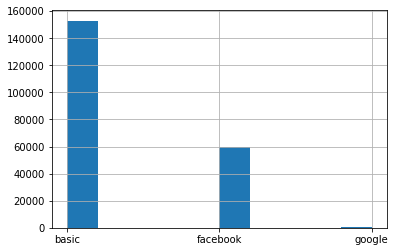

Distribution of the categorical variables:language

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64
Distribution of the categorical variables (In Percentage):language

en    97%
zh     1%
fr     1%
es     0%
ko     0%
de     0%
it     0%
ru     0%
pt     0%
ja     0%
sv     0%
nl     0%
tr     0%
da     0%
pl     0%
cs     0%
no     0%
el     0%
th     0%
id     0%
hu     0%
fi     0%
is     0%
ca     0%
hr     0%
Name: language, dtype: object
Below is the distribution the of the categorical variable:language



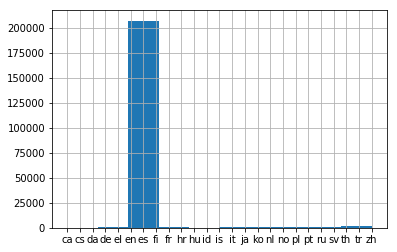

Distribution of the categorical variables:affiliate_channel

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
Distribution of the categorical variables (In Percentage):affiliate_channel

direct           65%
sem-brand        12%
sem-non-brand     9%
other             4%
seo               4%
api               4%
content           2%
remarketing       1%
Name: affiliate_channel, dtype: object
Below is the distribution the of the categorical variable:affiliate_channel



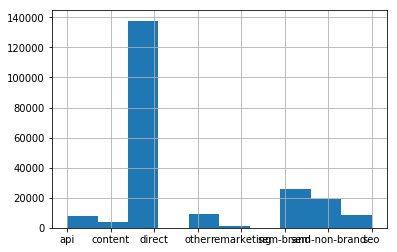

Distribution of the categorical variables:affiliate_provider

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64
Distribution of the categorical variables (In Percentage):affiliate_provider

direct                 64%
google                 24%
other                   6%
craigslist              2%
bing                    1%
facebook                1%
vast                    0%
padmapper               0%
facebook-open-graph     0%
yahoo                   0%
gsp        

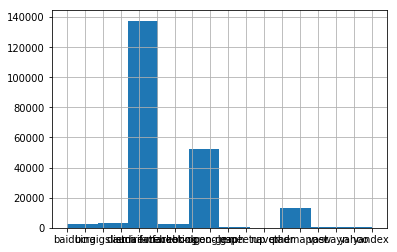

Distribution of the categorical variables:first_affiliate_tracked

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64
Distribution of the categorical variables (In Percentage):first_affiliate_tracked

untracked        51%
linked           22%
omg              21%
tracked-other     3%
product           1%
marketing         0%
local ops         0%
Name: first_affiliate_tracked, dtype: object
Below is the distribution the of the categorical variable:first_affiliate_tracked



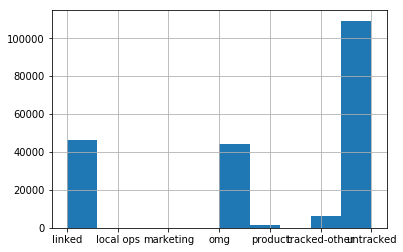

Distribution of the categorical variables:signup_app

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64
Distribution of the categorical variables (In Percentage):signup_app

Web        86%
iOS         9%
Moweb       3%
Android     3%
Name: signup_app, dtype: object
Below is the distribution the of the categorical variable:signup_app



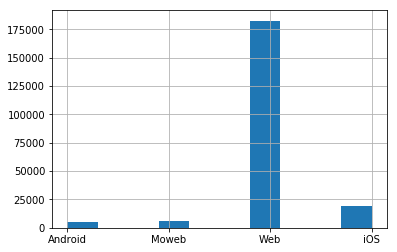

Distribution of the categorical variables:first_device_type

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64
Distribution of the categorical variables (In Percentage):first_device_type

Mac Desktop           42%
Windows Desktop       34%
iPhone                10%
iPad                   7%
Other/Unknown          5%
Android Phone          1%
Android Tablet         1%
Desktop (Other)        1%
SmartPhone (Other)     0%
Name: first_device_type, dtype: object
Below is the distribution the of the categorical variable:first_device_type



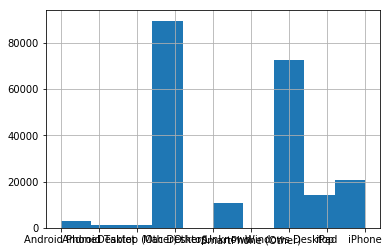

Distribution of the categorical variables:first_browser

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
CometBird                  11
SeaMonkey                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini   

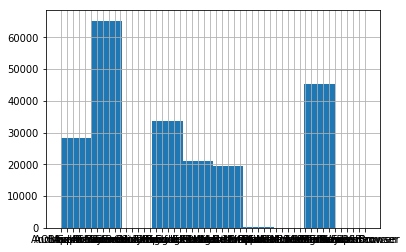

Distribution of the categorical variables:country_destination

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64
Distribution of the categorical variables (In Percentage):country_destination

NDF      58%
US       29%
other     5%
FR        2%
IT        1%
GB        1%
ES        1%
CA        1%
DE        0%
NL        0%
AU        0%
PT        0%
Name: country_destination, dtype: object
Below is the distribution the of the categorical variable:country_destination



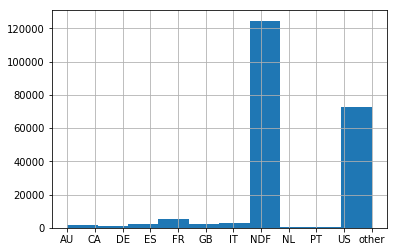

Distribution of the categorical variables:Account_creation_before_booking_flag

2.0    67475
1.0    21404
0.0       29
Name: Account_creation_before_booking_flag, dtype: int64
Distribution of the categorical variables (In Percentage):Account_creation_before_booking_flag

2.0    32%
1.0    10%
0.0     0%
Name: Account_creation_before_booking_flag, dtype: object
Below is the distribution the of the categorical variable:Account_creation_before_booking_flag



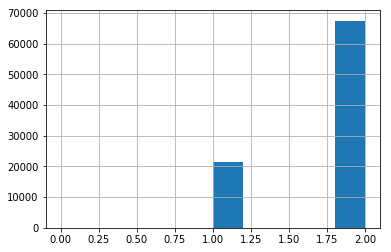

In [212]:
dataset= user_training_dataset
variable_type='Categorical'
for variable_name in categorical_variables:
    func_variable_exploratory_analysis(dataset, variable_name, variable_type)
    

    
    
    

Highlight from the continuous variables:
- Among the users who have made their books, up to 75% of them have made their booking within 30 days since they are active on the website.
- On average users have 75 activity counts on the website. 
- On average, users have spent around 414 hours, which doesn't make sense to me. 


Descriptive Statistics:age_computed

count    125461.000000
mean         37.945736
std          15.405991
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         122.000000
Name: age_computed, dtype: float64
Number of observations with missing value for the continuous variable:age_computed

87990.0
PDF and CDF of the variable:age_computed



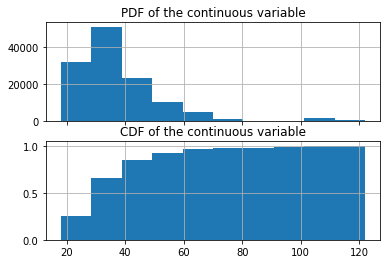

Descriptive Statistics:number_of_days_account_creation

count                         88908
unique                          391
top       0 days 00:00:00.000000000
freq                          21404
Name: number_of_days_account_creation, dtype: object
Number of observations with missing value for the continuous variable:number_of_days_account_creation

124543
PDF and CDF of the variable:number_of_days_account_creation



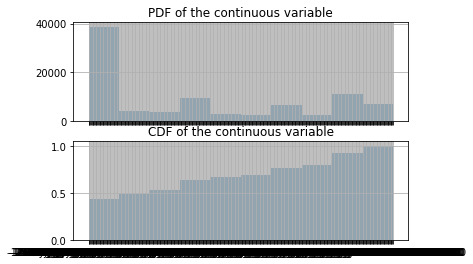

Descriptive Statistics:number_of_active_days_numeric_value

count    88908.000000
mean        44.692176
std         88.482784
min          0.000000
25%          1.000000
50%          3.000000
75%         29.000000
max       1369.000000
Name: number_of_active_days_numeric_value, dtype: float64
Number of observations with missing value for the continuous variable:number_of_active_days_numeric_value

124543.0
PDF and CDF of the variable:number_of_active_days_numeric_value



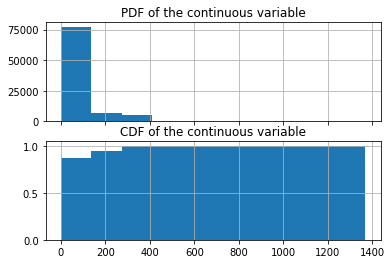

Descriptive Statistics:number_of_days_account_creation_numeric_value

count    88908.000000
mean        44.362498
std         87.499561
min       -349.000000
25%          1.000000
50%          3.000000
75%         29.000000
max        365.000000
Name: number_of_days_account_creation_numeric_value, dtype: float64
Number of observations with missing value for the continuous variable:number_of_days_account_creation_numeric_value

124543.0
PDF and CDF of the variable:number_of_days_account_creation_numeric_value



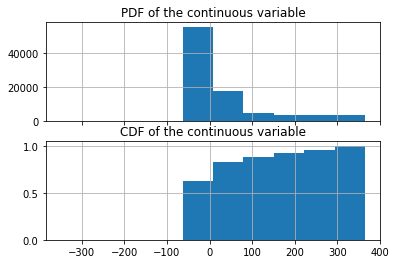

Descriptive Statistics:session count

count    73815.000000
mean        75.024819
std        112.543174
min          1.000000
25%         13.000000
50%         38.000000
75%         91.000000
max       2644.000000
Name: session count, dtype: float64
Number of observations with missing value for the continuous variable:session count

139636.0
PDF and CDF of the variable:session count



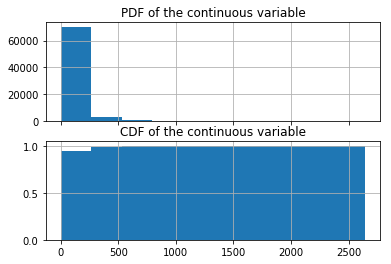

Descriptive Statistics:Total time spent (in seconds)

count    7.381500e+04
mean     1.514235e+06
std      1.913191e+06
min      0.000000e+00
25%      2.569205e+05
50%      8.728620e+05
75%      2.043488e+06
max      3.822136e+07
Name: Total time spent (in seconds), dtype: float64
Number of observations with missing value for the continuous variable:Total time spent (in seconds)

139636.0
PDF and CDF of the variable:Total time spent (in seconds)



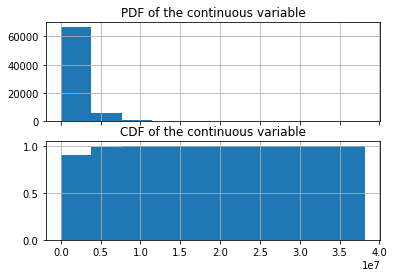

In [213]:
dataset= user_training_dataset
variable_type='Continuous'
for variable_name in continuous_variables:
    func_variable_exploratory_analysis(dataset, variable_name, variable_type)

Highlight from the Timestamp variables:
- The first active time stamp field and the account creation timestamp for the users ranges from 2009-03 to 2014-06.
- The first booking date field ranges from 2010-01 to 2015-01.

In [198]:
dataset= user_training_dataset
variable_type='Datetime'
for variable_name in timestamp_variables:
    func_variable_exploratory_analysis(dataset, variable_name, variable_type)

Number of observations with missing value for the continuous variable:timestamp_first_active_cleaned

Number of observations with missing value for the continuous variable:timestamp_first_active_cleaned 0
date range of timestamp_first_active_cleaned : From  2009-03-19 00:00:00  To  2014-06-30 00:00:00
Number of observations with missing value for the continuous variable:date_account_created

Number of observations with missing value for the continuous variable:date_account_created 0
date range of date_account_created : From  2010-01-01 00:00:00  To  2014-06-30 00:00:00
Number of observations with missing value for the continuous variable:date_first_booking

Number of observations with missing value for the continuous variable:date_first_booking 124543
date range of date_first_booking : From  2010-01-02 00:00:00  To  2015-06-29 00:00:00


Based on the country_destination field, create a field called Trip_booking_flag to understand the factors that could impact a user to book a trip on Airbnb.

In [3]:
user_training_dataset['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [58]:
user_training_dataset["trip_booking_flag"]=user_training_dataset['country_destination']!='NDF'

In [9]:
user_training_dataset["trip_booking_flag"].value_counts()

False    124543
True      88908
Name: trip_booking_flag, dtype: int64

In [10]:
user_training_dataset["trip_booking_flag"].value_counts()/user_training_dataset["trip_booking_flag"].count()

False    0.583473
True     0.416527
Name: trip_booking_flag, dtype: float64

58% of the users have not booked any Airbnb trip yet.

In [18]:
user_training_dataset.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed',
       'number_of_days_account_creation_numeric_value',
       'number_of_active_days_numeric_value',
       'Account_creation_before_booking_flag', 'user_id_x', 'session count',
       'user_id_y', 'Total time spent (in seconds)', 'trip_booking_flag'],
      dtype='object')

In [5]:
user_training_dataset.date_account_created=pd.to_datetime(user_training_dataset.date_account_created)
user_training_dataset.timestamp_first_active_cleaned=pd.to_datetime(user_training_dataset.timestamp_first_active_cleaned)
user_training_dataset.date_first_booking=pd.to_datetime(user_training_dataset.date_first_booking)

In [10]:
user_training_dataset.date_first_booking.max() #Timestamp('2015-06-29 00:00:00')
user_training_dataset.timestamp_first_active_cleaned.max() #Timestamp('2014-06-30 00:00:00')
user_training_dataset.date_account_created.max() #Timestamp('2014-06-30 00:00:00')

Timestamp('2014-06-30 00:00:00')

Create two more variables: 
- number of active days as of July 2015
- number of days since account created as of July 2015

In [12]:
Latest_date=pd.to_datetime('2015-7-1')

In [18]:
user_training_dataset['number_of_active_day_as_of_latest_date']=(Latest_date-user_training_dataset['timestamp_first_active_cleaned']).dt.days
user_training_dataset['number_of_days_since_account_creation_as_of_latest_date']=(Latest_date-user_training_dataset['date_account_created']).dt.days

Below is the distribution for both variables:

Here are the highlights:
- Users in the dataset have used Airbnb for at least a year (based on their first active days with the site). 50% of them have been on the site for fewer than 658 days.
- The distribution of number of days since account creation is very similar to number of active days as of latest day since the tracking of the users gets enabled once they created their account.

Descriptive Statistics:number_of_active_day_as_of_latest_date

count    213451.000000
mean        735.853334
std         312.842021
min         366.000000
25%         482.000000
50%         658.000000
75%         918.000000
max        2295.000000
Name: number_of_active_day_as_of_latest_date, dtype: float64
Number of observations with missing value for the continuous variable:number_of_active_day_as_of_latest_date

0.0
PDF and CDF of the variable:number_of_active_day_as_of_latest_date



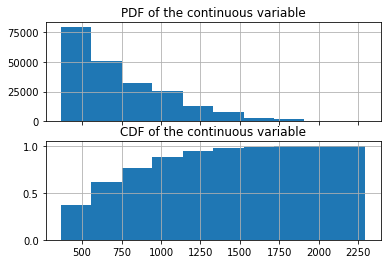

Descriptive Statistics:number_of_days_since_account_creation_as_of_latest_date

count    213451.000000
mean        735.621515
std         312.603661
min         366.000000
25%         482.000000
50%         658.000000
75%         917.000000
max        2007.000000
Name: number_of_days_since_account_creation_as_of_latest_date, dtype: float64
Number of observations with missing value for the continuous variable:number_of_days_since_account_creation_as_of_latest_date

0.0
PDF and CDF of the variable:number_of_days_since_account_creation_as_of_latest_date



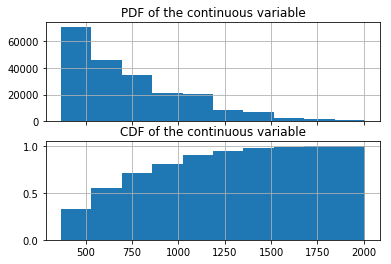

In [21]:
dataset=user_training_dataset
for variable_name in ['number_of_active_day_as_of_latest_date', 'number_of_days_since_account_creation_as_of_latest_date']:
    func_variable_exploratory_analysis(dataset, variable_name, variable_type='Continuous')

Discover the correlation between all the fields in the user_training_dataset

In [13]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
import matplotlib.pylab as plb
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Create a new dataframe user_training_dataset_update to only include the variables that will be included in the model:

In [59]:
user_training_dataset.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed',
       'number_of_days_account_creation_numeric_value',
       'number_of_active_days_numeric_value',
       'Account_creation_before_booking_flag', 'user_id_x', 'session count',
       'user_id_y', 'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'trip_booking_flag'],
      dtype='object')

In [60]:
user_training_dataset_update=user_training_dataset[['id', 'gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked','signup_app', 'first_device_type', 'first_browser', 'country_destination','age_computed',   'Account_creation_before_booking_flag', 'Total time spent (in seconds)', 'number_of_active_day_as_of_latest_date','number_of_days_since_account_creation_as_of_latest_date', 'session count', 'trip_booking_flag']]

Convert the following variables into categorical variables:

gender, signup_method, signup_flow, language, affiliate_channel, affiliate_provider,first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination, Account_creation_before_booking_flag


In [47]:
dataset=user_training_dataset_update
for variable_name in ['gender', 'signup_method', 'signup_flow', 'language','affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked','signup_app', 'first_device_type', 'first_browser','country_destination', 'Account_creation_before_booking_flag']:
    dataset[variable_name]=pd.Categorical(dataset[variable_name])

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
user_training_dataset_update.columns

Index(['id', 'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'age_computed',
       'Account_creation_before_booking_flag', 'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'session count'],
      dtype='object')

In [61]:
user_training_dataset_update.corr()

,signup_flow,age_computed,Account_creation_before_booking_flag,Total time spent (in seconds),number_of_active_day_as_of_latest_date,number_of_days_since_account_creation_as_of_latest_date,session count,trip_booking_flag
signup_flow,1.000000,-0.080061,0.025370,-0.073924,-0.202014,-0.202200,0.038500,-0.093888
age_computed,-0.080061,1.000000,-0.006423,0.029429,0.071820,0.071704,-0.020102,-0.026865
Account_creation_before_booking_flag,0.025370,-0.006423,1.000000,-0.098234,0.019108,0.019641,0.011427,NaN
Total time spent (in seconds),-0.073924,0.029429,-0.098234,1.000000,-0.036257,-0.036257,0.729524,0.150841
number_of_active_day_as_of_latest_date,-0.202014,0.071820,0.019108,-0.036257,1.000000,0.999270,-0.065437,0.094796
number_of_days_since_account_creation_as_of_latest_date,-0.202200,0.071704,0.019641,-0.036257,0.999270,1.000000,-0.065437,0.094604
session count,0.038500,-0.020102,0.011427,0.729524,-0.065437,-0.065437,1.000000,0.079348
trip_booking_flag,-0.093888,-0.026865,NaN,0.150841,0.094796,0.094604,0.079348,1.000000


In [62]:
correlation_user_training_dataset=user_training_dataset_update.corr()

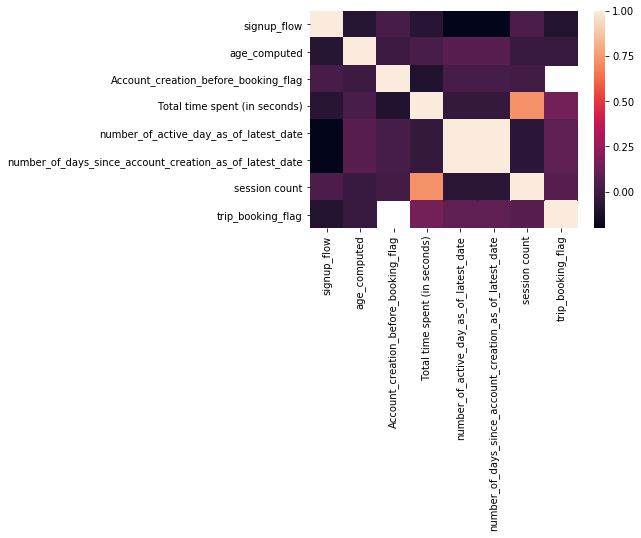

In [63]:
sns.heatmap(correlation_user_training_dataset)

Based on the heatmap, the variable that is most correlated to the trip_booking_flag is the total time spent (in seconds)

Export the dataset user_training_dataset_update into the csv file

In [66]:
user_training_dataset_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 19 columns):
id                                                         213451 non-null object
gender                                                     213451 non-null object
signup_method                                              213451 non-null object
signup_flow                                                213451 non-null int64
language                                                   213451 non-null object
affiliate_channel                                          213451 non-null object
affiliate_provider                                         213451 non-null object
first_affiliate_tracked                                    207386 non-null object
signup_app                                                 213451 non-null object
first_device_type                                          213451 non-null object
first_browser                                              213451 non-

In [65]:
user_training_dataset_update.head()

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_computed,Account_creation_before_booking_flag,Total time spent (in seconds),number_of_active_day_as_of_latest_date,number_of_days_since_account_creation_as_of_latest_date,session count,trip_booking_flag
0,gxn3p5htnn,-unknown-,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,2295,1829,NaN,False
1,820tgsjxq7,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,38.0,NaN,NaN,2230,1498,NaN,False
2,4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,56.0,0.0,NaN,2213,1737,NaN,True
3,bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,42.0,2.0,NaN,2069,1304,NaN,True
4,87mebub9p4,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,41.0,0.0,NaN,2031,1751,NaN,True


In [70]:
user_training_dataset_update.to_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/user_training_dataset_update.csv", index=False)